In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tensorflow import keras
from keras import layers,models
from keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten

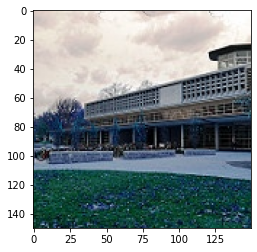

In [2]:
data='../input/intel-image-classification/seg_train/seg_train'
clasess=["buildings","forest","glacier","mountain","sea","street"]

for category in clasess:
    path=os.path.join(data,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break     

In [3]:
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [4]:
train_set=train_datagen.flow_from_directory(
"../input/intel-image-classification/seg_train/seg_train",
target_size=(150,150),
batch_size=256,
class_mode='sparse',
shuffle=True)

Found 14034 images belonging to 6 classes.


In [5]:
test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
rescale=1./255)

In [6]:
test_set=test_datagen.flow_from_directory(
'../input/intel-image-classification/seg_test/seg_test',
target_size=(150,150),
batch_size=256,
class_mode='sparse',
shuffle=True)    

Found 3000 images belonging to 6 classes.


In [7]:
train_set[1]

(array([[[[5.97148836e-01, 6.29231811e-01, 6.86985016e-01],
          [5.97139120e-01, 6.29251242e-01, 6.87014163e-01],
          [5.97129405e-01, 6.29270732e-01, 6.87043369e-01],
          ...,
          [7.45098054e-01, 8.16763818e-01, 8.32090974e-01],
          [7.45098054e-01, 8.16792965e-01, 8.32110405e-01],
          [7.45098054e-01, 8.16822171e-01, 8.32129836e-01]],
 
         [[6.02262855e-01, 6.24283731e-01, 6.77677155e-01],
          [6.02233708e-01, 6.24274015e-01, 6.77686870e-01],
          [6.02204561e-01, 6.24264240e-01, 6.77696586e-01],
          ...,
          [7.84053743e-01, 8.44902992e-01, 8.63835633e-01],
          [7.83937037e-01, 8.44815552e-01, 8.63738358e-01],
          [7.83820271e-01, 8.44727993e-01, 8.63641083e-01]],
 
         [[6.12202942e-01, 6.27012849e-01, 6.74071670e-01],
          [6.12193167e-01, 6.27022564e-01, 6.74081385e-01],
          [6.12183511e-01, 6.27032280e-01, 6.74091101e-01],
          ...,
          [8.06807935e-01, 8.62701237e-01, 8.7644

In [8]:
labels={0 : 'Buildings',
          1 : 'Forest',
          2 : 'Glacier',
          3 : 'Mountain',
          4 : 'Sea',
          5 : 'Street'}
labels

{0: 'Buildings',
 1: 'Forest',
 2: 'Glacier',
 3: 'Mountain',
 4: 'Sea',
 5: 'Street'}

In [9]:
model=keras.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dense(6,activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 82944)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                5308480   
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2

In [11]:
model.fit(x=train_set,validation_data=test_set,epochs=5)


Epoch 1/5
55/55 [==============================] - 151s 3s/step - loss: 1.7650 - accuracy: 0.3467 - val_loss: 1.1501 - val_accuracy: 0.5727
Epoch 2/5
55/55 [==============================] - 96s 2s/step - loss: 0.9688 - accuracy: 0.6301 - val_loss: 0.8470 - val_accuracy: 0.6960
Epoch 3/5
55/55 [==============================] - 96s 2s/step - loss: 0.8186 - accuracy: 0.7001 - val_loss: 0.8451 - val_accuracy: 0.7003
Epoch 4/5
55/55 [==============================] - 96s 2s/step - loss: 0.7435 - accuracy: 0.7260 - val_loss: 0.7879 - val_accuracy: 0.7233
Epoch 5/5
55/55 [==============================] - 95s 2s/step - loss: 0.6831 - accuracy: 0.7479 - val_loss: 0.7314 - val_accuracy: 0.7423


In [12]:
def prediction(path):
    img = tf.keras.preprocessing.image.load_img(path,target_size=(150,150))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img / 255.0
    img = np.array([img])
    pred = labels[np.argmax(model.predict(img))]
    plt.imshow(img.reshape(150,150,3))
    plt.title(pred)

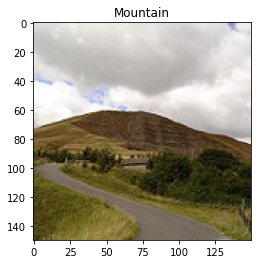

In [13]:
prediction('../input/intel-image-classification/seg_pred/seg_pred/10956.jpg')

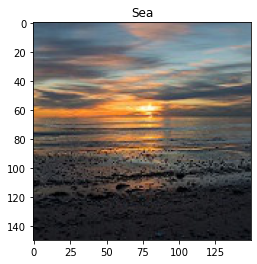

In [14]:
prediction('../input/intel-image-classification/seg_pred/seg_pred/10043.jpg')

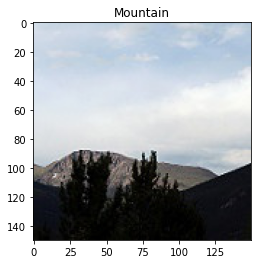

In [15]:
prediction('../input/intel-image-classification/seg_pred/seg_pred/10401.jpg')

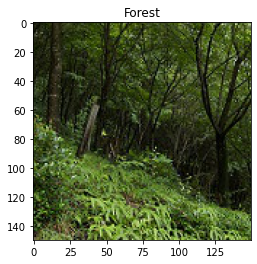

In [16]:

prediction('../input/intel-image-classification/seg_train/seg_train/forest/10007.jpg')